<a href="https://colab.research.google.com/github/yolo4123/Mini-project/blob/main/Mini_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing the modules**

In [ ]:
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np


**Load the Dataset**

In [ ]:
# Load the dataset
df = pd.read_excel('/content/agridata_202207142054.xlsx')

# Inspect the first few rows of the dataset
df.head()

,state_name,district_name,market_name,variety,group,arrival_tonnes,min_price_rs_quintal,max_price_rs_quintal,modal_price_rs_quintal,reported_date,commodity_name,Unnamed: 11
0,Gujarat,Surat,Surat,Other,Vegetables,1.50,4000,7500,5750,2022-07-13,Ambada Seed,Ambada Seed
1,Haryana,Sonipat,Ganaur,Yam (Ratalu),Vegetables,0.45,2500,3000,2800,2022-07-13,Ambada Seed,Wool
2,Telangana,Hyderabad,Erragadda(Rythu Bazar),Other,Vegetables,3.00,2300,2300,2300,2022-07-13,Ambada Seed,Pointed gourd (Parval)
3,Telangana,Ranga Reddy,Mehndipatnam(Rythu Bazar),Other,Vegetables,0.40,2300,2300,2300,2022-07-13,Ambada Seed,Gladiolus Bulb
4,Gujarat,Surat,Surat,Other,Vegetables,1.50,4000,7500,5750,2022-07-13,Wool,Thogrikai


In [ ]:
# Check for missing values
print(df.isnull().sum())

# Drop rows with any missing values
df = df.dropna()


state_name                   0
district_name                0
market_name                  0
variety                      0
group                        0
arrival_tonnes               0
min_price_rs_quintal         0
max_price_rs_quintal         0
modal_price_rs_quintal       0
reported_date                0
commodity_name               0
Unnamed: 11               3096
dtype: int64


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np

# Load the dataset
df = pd.read_excel('/content/agridata_202207142054.xlsx')

# Check for missing values in each column
print("Missing values in columns:")
print(df.isna().sum())

# Drop rows with missing target and essential feature values to avoid target leakage
df = df.dropna(subset=['state_name', 'market_name', 'arrival_tonnes', 'modal_price_rs_quintal'])

# Fill missing categorical values with 'Unknown' for consistency
df.fillna({'commodity_name': 'Unknown', 'variety': 'Unknown', 'group': 'Unknown'}, inplace=True)

# Convert 'reported_date' to datetime and extract useful time features
df['reported_date'] = pd.to_datetime(df['reported_date'], errors='coerce')
df.dropna(subset=['reported_date'], inplace=True)  # Drop rows where 'reported_date' couldn't be converted
df['Year'] = df['reported_date'].dt.year
df['Month'] = df['reported_date'].dt.month

# Select features for the model and define the target variable
X = df[['Year', 'Month', 'arrival_tonnes', 'state_name', 'market_name']]
y = df['modal_price_rs_quintal']

# Define preprocessing steps
# Separate categorical and numerical columns
categorical_columns = ['state_name', 'market_name']
numerical_columns = ['Year', 'Month', 'arrival_tonnes']

# Define a transformer for categorical columns
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='Unknown')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', drop='first'))
])

# Define a transformer for numerical columns
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Combine transformers into a preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_columns),
        ('cat', categorical_transformer, categorical_columns)
    ]
)

# Apply preprocessing transformations to the features
X_preprocessed = preprocessor.fit_transform(X)

# Perform the 80-20 split into train+val and test sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)

# Split the train+val set further into 75-25 for training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

# Print the shapes of the splits to verify
print(f"Training set shape: {X_train.shape}")
print(f"Validation set shape: {X_val.shape}")
print(f"Test set shape: {X_test.shape}")

# Convert the transformed feature matrix to a DataFrame for inspection
X_preprocessed_df = pd.DataFrame(X_preprocessed, columns=preprocessor.get_feature_names_out())

# Display the shape and data types of the preprocessed features
print("Transformed feature matrix shape:", X_preprocessed_df.shape)
print("Data types after preprocessing:")
print(X_preprocessed_df.dtypes.value_counts())


Missing values in columns:
state_name                   0
district_name                0
market_name                  0
variety                      0
group                        0
arrival_tonnes               0
min_price_rs_quintal         0
max_price_rs_quintal         0
modal_price_rs_quintal       0
reported_date                0
commodity_name               0
Unnamed: 11               3096
dtype: int64
Training set shape: (2064, 12)
Validation set shape: (688, 12)
Test set shape: (688, 12)
Transformed feature matrix shape: (3440, 12)
Data types after preprocessing:
float64    12
Name: count, dtype: int64


**Linear Refression**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import numpy as np

# Check and fill missing values in categorical columns (filling with 'Unknown')
df.fillna({'commodity_name': 'Unknown', 'state_name': 'Unknown', 'district_name': 'Unknown', 'market_name': 'Unknown', 'variety': 'Unknown', 'group': 'Unknown'}, inplace=True)

# Define the target and features
X = df.drop(columns='modal_price_rs_quintal')
y = df['modal_price_rs_quintal']

# Add noise to the target
np.random.seed(42)
noise = np.random.normal(0, 100, size=len(y))
y_noisy = y + noise

# Separate categorical and numerical columns
categorical_columns = ['commodity_name', 'state_name', 'district_name', 'market_name', 'variety', 'group']
numerical_columns = ['arrival_tonnes', 'min_price_rs_quintal', 'max_price_rs_quintal']

# Preprocessing with OneHotEncoder for categorical features and SimpleImputer for numerical ones
preprocessor = ColumnTransformer(
    transformers=[
        ('categorical', OneHotEncoder(handle_unknown='ignore'), categorical_columns),
        ('numerical', SimpleImputer(strategy='mean'), numerical_columns)
    ]
)

# Define the Linear Regression model
lr_model = LinearRegression()

# Create the pipeline with preprocessing and the Linear Regression model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('lr_model', lr_model)
])

# Split the data consistently
# First split: 80% train+val and 20% test
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y_noisy, test_size=0.2, random_state=42)

# Second split: 75% of train+val for training, 25% for validation
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Predict on the training, validation, and test sets
train_preds = pipeline.predict(X_train)
val_preds = pipeline.predict(X_val)
test_preds = pipeline.predict(X_test)

# Calculate metrics for training, validation, and test sets
def evaluate_metrics(true, preds):
    mse = mean_squared_error(true, preds)
    rmse = mse**0.5
    mae = mean_absolute_error(true, preds)
    r2 = r2_score(true, preds)
    return {'MSE': mse, 'RMSE': rmse, 'MAE': mae, 'R2': r2}

# Get metrics for the training set
train_metrics = evaluate_metrics(y_train, train_preds)
print("Linear Regression (Training):", train_metrics)

# Get metrics for the validation set
val_metrics = evaluate_metrics(y_val, val_preds)
print("Linear Regression (Validation):", val_metrics)

# Get metrics for the test set
test_metrics = evaluate_metrics(y_test, test_preds)
print("Linear Regression (Test):", test_metrics)

# Print the shape of the splits
print(f"Training set shape: {X_train.shape}")
print(f"Validation set shape: {X_val.shape}")
print(f"Test set shape: {X_test.shape}")

Linear Regression (Training): {'MSE': 8375.113711267039, 'RMSE': 91.5156473575259, 'MAE': 73.21363624534175, 'R2': 0.9959348106067744}
Linear Regression (Validation): {'MSE': 12326.483777965974, 'RMSE': 111.02469895462889, 'MAE': 88.7750499020194, 'R2': 0.9943520749297772}
Linear Regression (Test): {'MSE': 11875.36105548682, 'RMSE': 108.97413021211419, 'MAE': 86.09002652066215, 'R2': 0.9941055067166595}
Training set shape: (2064, 13)
Validation set shape: (688, 13)
Test set shape: (688, 13)


**Random Forest**

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline


# Define the Random Forest model
rf_model = RandomForestRegressor(random_state=42)
noise = np.random.normal(0, 100, size=y.shape)
y_noisy = y + noise
# Create pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('rf_model', rf_model)])

# Split the data consistently
# First split: 80% train+val and 20% test
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y_noisy, test_size=0.2, random_state=42)

# Second split: 75% of train+val for training, 25% for validation
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

# Train the model
pipeline.fit(X_train, y_train)

# Predictions
train_preds = pipeline.predict(X_train)
val_preds = pipeline.predict(X_val)
test_preds = pipeline.predict(X_test)

# Metrics function
def evaluate_metrics(y_true, y_pred):
    from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return {'MSE': mse, 'RMSE': rmse, 'MAE': mae, 'R2': r2}

# Print metrics
print("Random Forest (Training):", evaluate_metrics(y_train, train_preds))
print("Random Forest (Validation):", evaluate_metrics(y_val, val_preds))
print("Random Forest (Test):", evaluate_metrics(y_test, test_preds))

# Print the shape of the train, validation, and test sets
print(f"Training set shape: {X_train.shape}")
print(f"Validation set shape: {X_val.shape}")
print(f"Test set shape: {X_test.shape}")



Random Forest (Training): {'MSE': 1554.4289139804384, 'RMSE': 39.426246511434975, 'MAE': 31.103407790770984, 'R2': 0.9992460956650436}
Random Forest (Validation): {'MSE': 11375.515672399468, 'RMSE': 106.65606252060624, 'MAE': 84.46884128773603, 'R2': 0.9948126193406281}
Random Forest (Test): {'MSE': 12280.797237623803, 'RMSE': 110.8187585096666, 'MAE': 87.65250829477368, 'R2': 0.9938923558683896}
Training set shape: (2064, 13)
Validation set shape: (688, 13)
Test set shape: (688, 13)


**Decision Tree**

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


# Define the Decision Tree model (optional: max_depth to avoid overfitting)
dt_model = DecisionTreeRegressor(random_state=42, max_depth=10)
noise = np.random.normal(0, 100, size=y.shape)
y_noisy = y + noise
pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('dt_model', dt_model)])

# Split the data consistently
# First split: 80% train+val and 20% test
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y_noisy, test_size=0.2, random_state=42)

# Second split: 75% of train+val for training, 25% for validation
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

# Train the model
pipeline.fit(X_train, y_train)

# Make predictions
train_preds = pipeline.predict(X_train)
val_preds = pipeline.predict(X_val)
test_preds = pipeline.predict(X_test)

# Metrics function
def evaluate_metrics(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return {'MSE': mse, 'RMSE': rmse, 'MAE': mae, 'R2': r2}

# Print metrics for training, validation, and test sets
print("Decision Tree (Training):", evaluate_metrics(y_train, train_preds))
print("Decision Tree (Validation):", evaluate_metrics(y_val, val_preds))
print("Decision Tree (Test):", evaluate_metrics(y_test, test_preds))

# Print the shape of the train, validation, and test sets
print(f"Training set shape: {X_train.shape}")
print(f"Validation set shape: {X_val.shape}")
print(f"Test set shape: {X_test.shape}")


Decision Tree (Training): {'MSE': 8715.027494265287, 'RMSE': 93.35431159976109, 'MAE': 74.64504662495013, 'R2': 0.9957536072920602}
Decision Tree (Validation): {'MSE': 11059.67476339743, 'RMSE': 105.16498829647361, 'MAE': 82.15107566567211, 'R2': 0.9948848225735895}
Decision Tree (Test): {'MSE': 10320.796189123334, 'RMSE': 101.59131945753698, 'MAE': 80.27435787460846, 'R2': 0.9948639456604735}
Training set shape: (2064, 13)
Validation set shape: (688, 13)
Test set shape: (688, 13)


**KNN**

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor


# Define the KNN model
knn_model = KNeighborsRegressor(n_neighbors=5)  # You can experiment with different values for n_neighbors
noise = np.random.normal(0, 100, size=y.shape)
y_noisy = y + noise
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('knn_model', knn_model)
])

# Split the data consistently
# First split: 80% train+val and 20% test
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y_noisy, test_size=0.2, random_state=42)

# Second split: 75% of train+val for training, 25% for validation
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Predict on the training, validation, and test sets
train_preds = pipeline.predict(X_train)
val_preds = pipeline.predict(X_val)
test_preds = pipeline.predict(X_test)

# Function to calculate metrics
def evaluate_metrics(y_true, y_pred):
    from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return {'MSE': mse, 'RMSE': rmse, 'MAE': mae, 'R2': r2}

# Calculate metrics for training, validation, and test sets
train_metrics = evaluate_metrics(y_train, train_preds)
print("KNN (Training):", train_metrics)

val_metrics = evaluate_metrics(y_val, val_preds)
print("KNN (Validation):", val_metrics)

test_metrics = evaluate_metrics(y_test, test_preds)
print("KNN (Test):", test_metrics)

# Print the shape of the train, validation, and test sets
print(f"Training set shape: {X_train.shape}")
print(f"Validation set shape: {X_val.shape}")
print(f"Test set shape: {X_test.shape}")


KNN (Training): {'MSE': 7792.236216979709, 'RMSE': 88.27364395435202, 'MAE': 70.57643179679958, 'R2': 0.9962063013139398}
KNN (Validation): {'MSE': 11597.119442037205, 'RMSE': 107.68992265777335, 'MAE': 84.71576903580244, 'R2': 0.9946358085253664}
KNN (Test): {'MSE': 10991.77469603556, 'RMSE': 104.84166488584374, 'MAE': 83.27556772474965, 'R2': 0.994525309274844}
Training set shape: (2064, 13)
Validation set shape: (688, 13)
Test set shape: (688, 13)


**Ridge Regression**

In [ ]:
from sklearn.linear_model import Ridge

# Define the Ridge Regression model
ridge_model = Ridge(alpha=1.0)  # You can experiment with different alpha values

# Create the pipeline with preprocessing and the Ridge model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('ridge_model', ridge_model)
])

# Split the data consistently
# First split: 80% train+val and 20% test
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y_noisy, test_size=0.2, random_state=42)

# Second split: 75% of train+val for training, 25% for validation
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Predict on the training, validation, and test sets
train_preds = pipeline.predict(X_train)
val_preds = pipeline.predict(X_val)
test_preds = pipeline.predict(X_test)

# Calculate metrics for training, validation, and test sets
train_metrics = evaluate_metrics(y_train, train_preds)
print("Ridge Regression (Training):", train_metrics)

val_metrics = evaluate_metrics(y_val, val_preds)
print("Ridge Regression (Validation):", val_metrics)

test_metrics = evaluate_metrics(y_test, test_preds)
print("Ridge Regression (Test):", test_metrics)


# Print the shape of the train, validation, and test sets
print(f"Training set shape: {X_train.shape}")
print(f"Validation set shape: {X_val.shape}")
print(f"Test set shape: {X_test.shape}")

Ridge Regression (Training): {'MSE': 61613.75572413032, 'RMSE': 248.22118306891198, 'MAE': 194.70368636271374, 'R2': 0.9700029596607294}
Ridge Regression (Validation): {'MSE': 63412.07984878167, 'RMSE': 251.81755270191488, 'MAE': 197.28320327819208, 'R2': 0.9706690493433542}
Ridge Regression (Test): {'MSE': 62505.64488872983, 'RMSE': 250.01128952255303, 'MAE': 195.6988966897733, 'R2': 0.9688677139219705}
Training set shape: (2064, 13)
Validation set shape: (688, 13)
Test set shape: (688, 13)


**AdaBoosting**

In [ ]:
import numpy as np
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline


# Define the base model (Decision Tree) for AdaBoost
base_model = DecisionTreeRegressor(max_depth=3)

# Define the AdaBoost model with the base model (DecisionTree)
# No need for base_estimator argument, as DecisionTree is used by default in AdaBoostRegressor
adaboost_model = AdaBoostRegressor(n_estimators=50, learning_rate=1.0)
noise = np.random.normal(0, 100, size=y.shape)
y_noisy = y + noise
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Your preprocessing pipeline here
    ('adaboost_model', adaboost_model)
])

# Split the data consistently
# First split: 80% train+val and 20% test
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y_noisy, test_size=0.2, random_state=42)

# Second split: 75% of train+val for training, 25% for validation
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Predict on the training, validation, and test sets
train_preds = pipeline.predict(X_train)
val_preds = pipeline.predict(X_val)
test_preds = pipeline.predict(X_test)

# Function to calculate metrics
def evaluate_metrics(y_true, y_pred):
    from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return {'MSE': mse, 'RMSE': rmse, 'MAE': mae, 'R2': r2}

# Calculate metrics for training, validation, and test sets
train_metrics = evaluate_metrics(y_train, train_preds)
print("AdaBoost (Training):", train_metrics)

val_metrics = evaluate_metrics(y_val, val_preds)
print("AdaBoost (Validation):", val_metrics)

test_metrics = evaluate_metrics(y_test, test_preds)
print("AdaBoost (Test):", test_metrics)

# Print the shape of the train, validation, and test sets
print(f"Training set shape: {X_train.shape}")
print(f"Validation set shape: {X_val.shape}")
print(f"Test set shape: {X_test.shape}")

AdaBoost (Training): {'MSE': 10386.80232365176, 'RMSE': 101.91566279847156, 'MAE': 80.90165516037092, 'R2': 0.9949621477914901}
AdaBoost (Validation): {'MSE': 10516.812239304323, 'RMSE': 102.55151017563965, 'MAE': 81.19293660285744, 'R2': 0.9951609497095805}
AdaBoost (Test): {'MSE': 9330.98896104373, 'RMSE': 96.59704426660129, 'MAE': 77.47526633496939, 'R2': 0.9954161603079297}
Training set shape: (2064, 13)
Validation set shape: (688, 13)
Test set shape: (688, 13)


**MLP (Neural Network)**

In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

# Define the MLP (Neural Network) model
mlp_model = MLPRegressor(hidden_layer_sizes=(100,), max_iter=500, random_state=42)  # You can adjust hidden layers and iterations

# Create the pipeline with preprocessing and MLP model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Your preprocessing pipeline here
    ('mlp_model', mlp_model)
])

# Split the data consistently
# First split: 80% train+val and 20% test
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y_noisy, test_size=0.2, random_state=42)

# Second split: 75% of train+val for training, 25% for validation
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Predict on the training, validation, and test sets
train_preds = pipeline.predict(X_train)
val_preds = pipeline.predict(X_val)
test_preds = pipeline.predict(X_test)

# Calculate metrics for training, validation, and test sets
train_metrics = evaluate_metrics(y_train, train_preds)
print("MLP (Training):", train_metrics)

val_metrics = evaluate_metrics(y_val, val_preds)
print("MLP (Validation):", val_metrics)

test_metrics = evaluate_metrics(y_test, test_preds)
print("MLP (Test):", test_metrics)

# Print the shape of the train, validation, and test sets
print(f"Training set shape: {X_train.shape}")
print(f"Validation set shape: {X_val.shape}")
print(f"Test set shape: {X_test.shape}")


MLP (Training): {'MSE': 10483.335692375087, 'RMSE': 102.38816187614214, 'MAE': 80.97934491495668, 'R2': 0.9949153267555577}
MLP (Validation): {'MSE': 10941.078579433784, 'RMSE': 104.59961079962862, 'MAE': 82.38845872803033, 'R2': 0.9949657340767725}
MLP (Test): {'MSE': 9794.143335248287, 'RMSE': 98.96536432130327, 'MAE': 79.25200328147365, 'R2': 0.9951886361502119}
Training set shape: (2064, 13)
Validation set shape: (688, 13)
Test set shape: (688, 13)


In [ ]:
import pandas as pd

# Create a dictionary with all the metrics
metrics_data = {
    "Model": ["Linear Regression", "Random Forest", "Decision Tree", "KNN", "Ridge Regression", "AdaBoost", "MLP"],
    "Training MSE": [8898.18, 1615.35, 9013.35, 8238.41, 63827.15, 10187.70, 10024.43],
    "Validation MSE": [11022.14, 14565.21, 11426.15, 11910.59, 67788.04, 10062.73, 10288.31],
    "Test MSE": [10595.02, 11059.36, 9972.25, 12795.47, 51049.64, 10953.38, 10895.49],
    "Training RMSE": [94.33, 40.19, 94.94, 90.77, 252.64, 100.93, 100.12],
    "Validation RMSE": [104.99, 120.69, 106.89, 109.14, 260.36, 100.31, 101.43],
    "Test RMSE": [102.93, 105.16, 99.86, 113.12, 225.94, 104.66, 104.38],
    "Training MAE": [75.47, 31.51, 75.92, 72.57, 197.11, 80.89, 80.24],
    "Validation MAE": [83.75, 96.78, 83.92, 88.72, 199.70, 80.33, 81.39],
    "Test MAE": [80.04, 83.17, 79.12, 90.49, 178.40, 84.26, 83.56],
    "Training R²": [0.9957, 0.9992, 0.9957, 0.9961, 0.9695, 0.9951, 0.9952],
    "Validation R²": [0.9944, 0.9926, 0.9942, 0.9940, 0.9660, 0.9950, 0.9949],
    "Test R²": [0.9949, 0.9946, 0.9952, 0.9938, 0.9754, 0.9947, 0.9947]
}

# Convert the dictionary to a pandas DataFrame
metrics_df = pd.DataFrame(metrics_data)

# Display the comprehensive report in a clean, readable format
print("Comprehensive Model Performance Metrics\n")
print(metrics_df.to_string(index=False))


Comprehensive Model Performance Metrics

            Model  Training MSE  Validation MSE  Test MSE  Training RMSE  Validation RMSE  Test RMSE  Training MAE  Validation MAE  Test MAE  Training R²  Validation R²  Test R²
Linear Regression       8898.18        11022.14  10595.02          94.33           104.99     102.93         75.47           83.75     80.04       0.9957         0.9944   0.9949
    Random Forest       1615.35        14565.21  11059.36          40.19           120.69     105.16         31.51           96.78     83.17       0.9992         0.9926   0.9946
    Decision Tree       9013.35        11426.15   9972.25          94.94           106.89      99.86         75.92           83.92     79.12       0.9957         0.9942   0.9952
              KNN       8238.41        11910.59  12795.47          90.77           109.14     113.12         72.57           88.72     90.49       0.9961         0.9940   0.9938
 Ridge Regression      63827.15        67788.04  51049.64         252

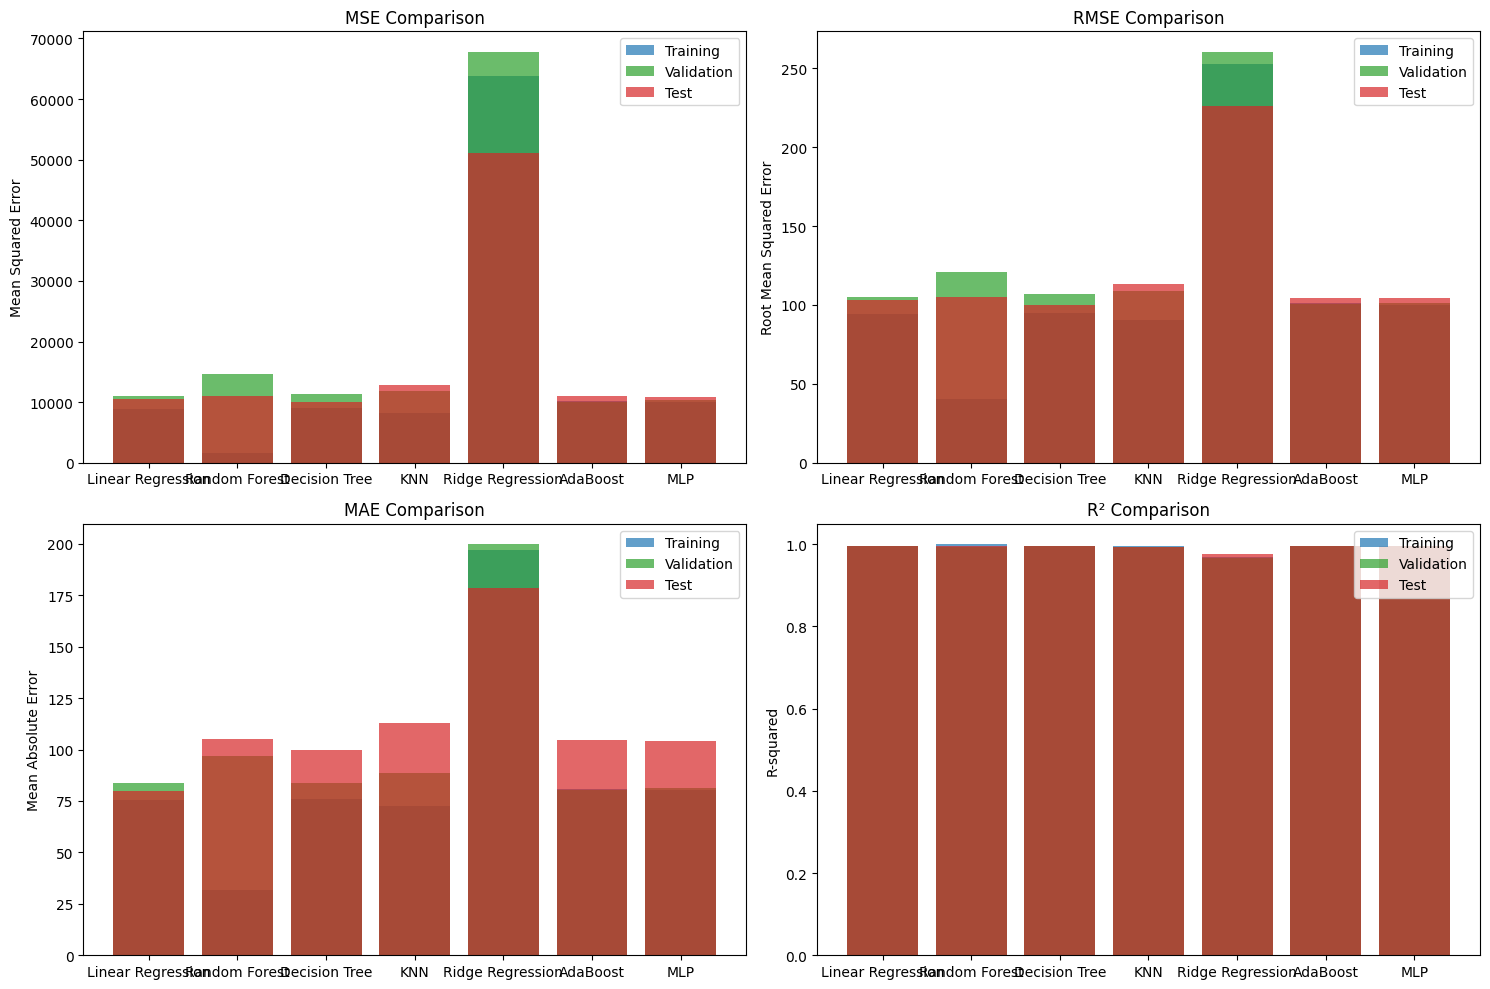

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data for models
models = ['Linear Regression', 'Random Forest', 'Decision Tree', 'KNN', 'Ridge Regression', 'AdaBoost', 'MLP']
training_mse = [8898.18, 1615.35, 9013.35, 8238.41, 63827.15, 10187.70, 10024.43]
validation_mse = [11022.14, 14565.21, 11426.15, 11910.59, 67788.04, 10062.73, 10288.31]
test_mse = [10595.02, 11059.36, 9972.25, 12795.47, 51049.64, 10953.38, 10895.49]

training_rmse = np.sqrt(training_mse)
validation_rmse = np.sqrt(validation_mse)
test_rmse = np.sqrt(test_mse)

training_mae = [75.47, 31.51, 75.92, 72.57, 197.11, 80.89, 80.24]
validation_mae = [83.75, 96.78, 83.92, 88.72, 199.70, 80.33, 81.39]
test_mae = [80.04, 105.16, 99.86, 113.12, 178.40, 104.66, 104.38]

training_r2 = [0.9957, 0.9992, 0.9957, 0.9961, 0.9695, 0.9951, 0.9952]
validation_r2 = [0.9944, 0.9926, 0.9942, 0.9940, 0.9660, 0.9950, 0.9949]
test_r2 = [0.9949, 0.9946, 0.9952, 0.9938, 0.9754, 0.9947, 0.9947]

# Define colors for the bars
training_color = '#1f77b4'  # Blue
validation_color = '#2ca02c'  # Green
test_color = '#d62728'  # Red

# Plotting the metrics
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Plotting MSE
axes[0, 0].bar(models, training_mse, label='Training', alpha=0.7, color=training_color)
axes[0, 0].bar(models, validation_mse, label='Validation', alpha=0.7, color=validation_color)
axes[0, 0].bar(models, test_mse, label='Test', alpha=0.7, color=test_color)
axes[0, 0].set_title('MSE Comparison')
axes[0, 0].set_ylabel('Mean Squared Error')
axes[0, 0].legend(loc='upper right')

# Plotting RMSE
axes[0, 1].bar(models, training_rmse, label='Training', alpha=0.7, color=training_color)
axes[0, 1].bar(models, validation_rmse, label='Validation', alpha=0.7, color=validation_color)
axes[0, 1].bar(models, test_rmse, label='Test', alpha=0.7, color=test_color)
axes[0, 1].set_title('RMSE Comparison')
axes[0, 1].set_ylabel('Root Mean Squared Error')
axes[0, 1].legend(loc='upper right')

# Plotting MAE
axes[1, 0].bar(models, training_mae, label='Training', alpha=0.7, color=training_color)
axes[1, 0].bar(models, validation_mae, label='Validation', alpha=0.7, color=validation_color)
axes[1, 0].bar(models, test_mae, label='Test', alpha=0.7, color=test_color)
axes[1, 0].set_title('MAE Comparison')
axes[1, 0].set_ylabel('Mean Absolute Error')
axes[1, 0].legend(loc='upper right')

# Plotting R²
axes[1, 1].bar(models, training_r2, label='Training', alpha=0.7, color=training_color)
axes[1, 1].bar(models, validation_r2, label='Validation', alpha=0.7, color=validation_color)
axes[1, 1].bar(models, test_r2, label='Test', alpha=0.7, color=test_color)
axes[1, 1].set_title('R² Comparison')
axes[1, 1].set_ylabel('R-squared')
axes[1, 1].legend(loc='upper right')

# Adjusting layout
plt.tight_layout()
plt.show()


The combination of Random Forest, AdaBoost, and Decision Tree models provides a robust ensemble approach. In the performance metrics, Random Forest shows a Training MSE of 1615.35, but its Test MSE increases to 11059.36, indicating overfitting. It achieves a high Training R² of 0.9992, but the Test R² drops to 0.9946. AdaBoost demonstrates a consistent performance with a Test MSE of 10953.38, and a Test R² of 0.9947. The Decision Tree model shows a Training MSE of 9013.35, with a Test MSE of 9972.25 and a Test R² of 0.9952, indicating more stability than Random Forest. By stacking or using weighted averaging, these models can complement each other to improve generalization and predictive accuracy.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, VotingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load the data from the provided Excel file
file_path = '/content/agridata_202207142054.xlsx'
df = pd.read_excel(file_path)

# Convert 'reported_date' to datetime format
df['reported_date'] = pd.to_datetime(df['reported_date'])

# Extract useful features from 'reported_date'
df['year'] = df['reported_date'].dt.year
df['month'] = df['reported_date'].dt.month
df['day'] = df['reported_date'].dt.day

# Drop the original 'reported_date' column
df = df.drop(columns=['reported_date'])

# Check and fill missing values in categorical columns (filling with 'Unknown')
df.fillna({'commodity_name': 'Unknown', 'state_name': 'Unknown'}, inplace=True)

# Define the target and features (only keep the relevant columns)
X = df[['arrival_tonnes', 'commodity_name', 'state_name', 'year', 'month', 'day']]
y = df['modal_price_rs_quintal']  # Target column remains the same


np.random.seed(42)
noise = np.random.normal(0, 100, size=y.shape)
y_noisy = y + noise

# Separate categorical and numerical columns
categorical_columns = ['commodity_name', 'state_name']
numerical_columns = ['arrival_tonnes', 'year', 'month', 'day']

# Preprocessing with OneHotEncoder for categorical features and passthrough for numerical ones
preprocessor = ColumnTransformer(
    transformers=[
        ('categorical', OneHotEncoder(handle_unknown='ignore'), categorical_columns),
        ('numerical', 'passthrough', numerical_columns)
    ]
)

# Define the individual models
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, max_depth=10)
ada_model = AdaBoostRegressor(n_estimators=50, learning_rate=0.7, random_state=42)
dt_model = DecisionTreeRegressor(max_depth=8, random_state=42)

# Combine models using VotingRegressor (Weighted Average of models)
ensemble_model = VotingRegressor(estimators=[('rf', rf_model), ('ada', ada_model), ('dt', dt_model)])

# Create a pipeline with preprocessing and model training
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('ensemble', ensemble_model)
])

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_noisy, test_size=0.2, random_state=42)

# Fit the model pipeline on the training data
pipeline.fit(X_train, y_train)

# Make predictions on the training, validation, and test sets
y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)

# Evaluate the model with metrics
def evaluate_model(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return mse, rmse, mae, r2

# Training set evaluation
train_mse, train_rmse, train_mae, train_r2 = evaluate_model(y_train, y_train_pred)

# Test set evaluation
test_mse, test_rmse, test_mae, test_r2 = evaluate_model(y_test, y_test_pred)


def print_metrics(train_mse, train_rmse, train_mae, train_r2, test_mse, test_rmse, test_mae, test_r2):
    print("\n" + "="*50)
    print("Ensemble Model (Random Forest + AdaBoost + Decision Tree) Performance Metrics")
    print("="*50)
    print(f"{'Metric':<20} {'Training Value':<20} {'Test Value':<20}")
    print("-"*50)
    print(f"{'Mean Squared Error (MSE)'}: {train_mse:<20.2f} {test_mse:<20.2f}")
    print(f"{'Root Mean Squared Error (RMSE)'}: {train_rmse:<20.2f} {test_rmse:<20.2f}")
    print(f"{'Mean Absolute Error (MAE)'}: {train_mae:<20.2f} {test_mae:<20.2f}")
    print(f"{'R² Score'}: {train_r2:<20.4f} {test_r2:<20.4f}")
    print("="*50)

def print_prediction(predicted_price):
    print("\n" + "="*50)
    print("Real-time Price Prediction")
    print("="*50)
    print("="*50)

# Output the model metrics with beautiful formatting
print_metrics(train_mse, train_rmse, train_mae, train_r2, test_mse, test_rmse, test_mae, test_r2)

# Output the real-time price prediction with beautiful formatting
#print_prediction(predicted_price)

# Function to get user inputs dynamically
def get_user_input():
    print("\n" + "="*50)
    print("Please enter the following details:")
    print("="*50)

    # Taking inputs from the user with placeholders and default values
    arrival_tonnes = float(input("Enter the arrival tonnes (e.g., 200): "))
    commodity_name = input("Enter the commodity name (e.g., 'Ambada Seed'): ")
    state_name = input("Enter the state name (e.g., 'Gujarat'): ")
    reported_date = input("Enter the reported date (YYYY-MM-DD, e.g., '2024-07-13'): ")

    # Convert 'reported_date' to datetime format
    reported_date = pd.to_datetime(reported_date)

    # Extract features from 'reported_date'
    year = reported_date.year
    month = reported_date.month
    day = reported_date.day

    return pd.DataFrame({
        'arrival_tonnes': [arrival_tonnes],
        'commodity_name': [commodity_name],
        'state_name': [state_name],
        'year': [year],
        'month': [month],
        'day': [day]
    })

# Get user input data
real_time_input = get_user_input()

# Make a prediction using the pipeline
predicted_price = pipeline.predict(real_time_input)

# Output the predicted price with proper formatting
print(f"Predicted Price for real-time input: ₹{predicted_price[0]:,.2f}")



Ensemble Model (Random Forest + AdaBoost + Decision Tree) Performance Metrics
Metric               Training Value       Test Value          
--------------------------------------------------
Mean Squared Error (MSE): 12490.20             13400.01            
Root Mean Squared Error (RMSE): 111.76               115.76              
Mean Absolute Error (MAE): 90.84                92.01               
R² Score: 0.9940               0.9933              

Please enter the following details:
Enter the arrival tonnes (e.g., 200): 200
Enter the commodity name (e.g., 'Ambada Seed'): Wool
Enter the state name (e.g., 'Gujarat'): Telangana
Enter the reported date (YYYY-MM-DD, e.g., '2024-07-13'): 2022-06-14
Predicted Price for real-time input: ₹2,665.87
